# Imports

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Loading Data

In [3]:
data_raw = pd.read_csv('data/Salary.csv')

In [4]:
data_raw.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


# Preparing the Data

In [6]:
y = data_raw.Salary.copy()
X = data_raw.YearsExperience.copy()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [8]:
X_train = np.array(X_train).reshape(-1,1)

In [9]:
X_test = np.array(X_test).reshape(-1,1)

# Building and Training the model

array([[<AxesSubplot:xlabel='YearsExperience', ylabel='YearsExperience'>,
        <AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>],
       [<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>,
        <AxesSubplot:xlabel='Salary', ylabel='Salary'>]], dtype=object)

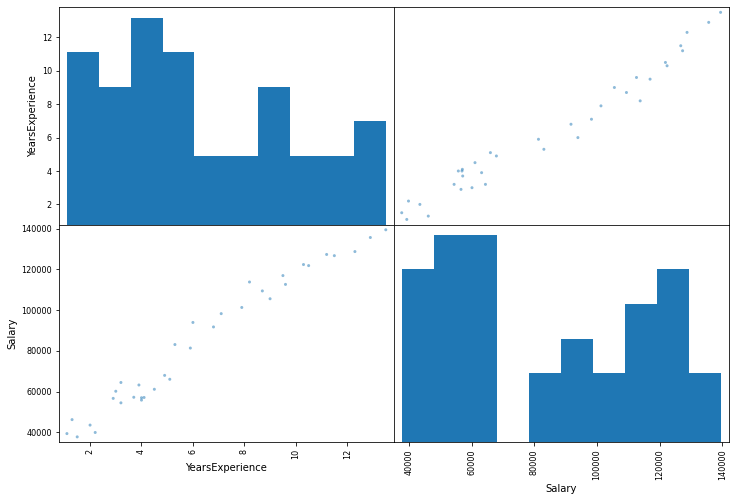

In [10]:
scatter_matrix(data_raw, figsize=(12,8))

## Linear Regression

In [11]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
pred = lin_model.predict(X_test)

In [12]:
lin_mape = mean_absolute_percentage_error(y_test, pred)
print(f'{lin_mape*100:.2f}%')

7.55%


In [13]:
lin_mae = mean_absolute_error(y_test, pred)
lin_mae

6692.364094497284

## Decision Tree Regressor

In [14]:
reg_tree = DecisionTreeRegressor()
reg_tree.fit(X_train, y_train)
pred_tree = reg_tree.predict(X_test)

In [15]:
tree_mape = mean_absolute_percentage_error(y_test, pred_tree)
print(f'MAPE: {tree_mape*100:.2f}%')

MAPE: 4.53%


In [20]:
tree_mae = mean_absolute_error(y_test, pred_tree)
print(f'MAE: {tree_mae:,.2f}')

MAE: 4,346.93


## Random Forest Regressor

In [17]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)

In [21]:
rf_mape = mean_absolute_percentage_error(y_test, pred_rf)
print(f'MAPE: {rf_mape*100:.2f}%')

MAPE: 3.28%


In [22]:
rf_mae = mean_absolute_error(y_test, pred_rf)
print(f'MAE: {tree_mae:,.2f}')

MAE: 4,346.93
